In [1]:
import os
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
# add MAE
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import scienceplots


In [3]:
power = pd.read_csv('debug_logs/real_power_gurobi_phase_3_step_leap_1_forecast_step_1.csv')
power = power.melt(id_vars=['time_step'], var_name='building', value_name='net_target')
power = power.sort_values(by=['time_step', 'building'])
power['building'] = power['building'].str[-1].astype(int)
power = power[power['time_step'] != -1]
lead_times = [f'+{i}h' for i in range(24)]
# upload min-max scaler from scalers folders with .save extension
power_norm = pd.DataFrame()
for building in range(5):
    power_norm_temp = pd.DataFrame()
    power_norm_temp['time_step'] = power.loc[power['building'] == building, 'time_step']
    power_norm_temp['building'] = building
    power_norm_temp['net_target'] = power.loc[power['building'] == building, 'net_target']
    for i, lead_time in enumerate(lead_times):
        power_norm_temp[lead_time] = power_norm_temp['net_target'].shift(-int(i))
    power_norm = pd.concat([power_norm, power_norm_temp], axis=0)
power_norm = power_norm.dropna()
power_norm = power_norm.sort_values(by=['time_step', 'building'])
# drop the net_target column
power_norm = power_norm.drop(columns=['net_target'])
# set the index to time_step and building
power_norm = power_norm.set_index(['time_step', 'building'])
power_norm

+0h           +1h           +2h           +3h  \
time_step building                                                           
0         0         6.907833e-01  6.887500e-01  6.335667e-01  6.768111e-01   
          1         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
          2         1.405750e+00  1.187467e+00  1.100133e+00  1.247567e+00   
          3         3.328667e-01  7.353000e-01  2.221967e+00  8.956500e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
...                          ...           ...           ...           ...   
8735      0         2.538714e+00  1.549117e+00  1.094456e+00  8.372500e-01   
          1         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
          2         6.969639e-01  3.210000e-01  3.210944e-01  3.088667e-01   
          3         4.002333e-01  3.982500e-01  3.777389e-01  6.308833e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   

                             +4h           +5h       +6h       +7h       +8h  \
time_step building                                                             
0         0         6.204500e-01  1.463322e+00  1.589600  0.230944  0.224400   
          1         1.000000e-07 -4.568323e-02  0.074033  0.331600  0.985483   
          2         7.937833e-01  9.422500e-01  1.120967  1.330017  0.269967   
          3         3.305833e-01  4.994500e-01  3.203350 -0.007133 -0.404317   
          4         1.000000e-07  1.000000e-07  0.069367  0.495367  1.215700   
...                          ...           ...       ...       ...       ...   
8735      0         8.467278e-01  8.167167e-01  0.791372  0.733233  1.480450   
          1         1.000000e-07  1.000000e-07 -0.049367 -0.091067  0.232261   
          2         3.979000e-01  4.443667e-01  0.261883  0.903417 -0.208967   
          3         2.034978e+00  4.323000e-01  0.202372 -0.081250 -0.404711   
          4         1.000000e-07  1.000000e-07 -0.080200  0.353133  1.000117   

                         +9h  ...      +14h      +15h      +16h      +17h  \
time_step building            ...                                           
0         0        -0.346778  ... -0.517433 -0.148833  0.445283  1.518111   
          1         1.902900  ... -0.023517 -0.355717 -0.244867 -0.174317   
          2         0.224567  ...  0.305383 -0.234767  0.502983  0.846617   
          3        -0.658783  ... -0.111100 -0.087400 -0.441150  0.256567   
          4         1.586317  ...  0.246533  0.060083  0.088150  0.002800   
...                      ...  ...       ...       ...       ...       ...   
8735      0         1.830917  ...  0.431950  0.784183  2.168217 -0.001617   
          1         1.258350  ...  1.783289 -0.429817  0.573756 -0.486300   
          2         0.269117  ... -1.717206  0.196217  1.476428  2.158550   
          3        -0.662000  ...  1.747511  1.755267  2.693389  3.650067   
          4         1.832300  ...  3.023450  2.676717  2.130667  1.408808   

                            +18h          +19h          +20h          +21h  \
time_step building                                                           
0         0         2.988317e+00  3.048861e+00  3.568817e+00  2.022833e+00   
          1        -1.911658e-02  1.000000e-07  1.000000e-07  1.000000e-07   
          2         2.221517e+00  1.808833e+00  2.170200e+00  1.665800e+00   
          3         2.051300e+00  4.820833e-01  8.071167e-01  4.758667e-01   
          4         1.000000e-07  1.000000e-07  1.000000e-07  1.000000e-07   
...                          ...           ...           ...           ...   
8735      0         1.501522e+00  2.318817e+00  2.670267e+00  2.351483e+00   
          1        -3.445943e-01 -3.821657e-02  1.000000e-07  1.000000e-07   
          2         1.526644e+00  3.313683e+00  1.880772e+00  3.529250e+00   
          3         3.671528e+00  2.727883e+00  1.323300e+00  1.507017e+00   
          4         5.775250e-01 -3

In [4]:
def get_power_norm(phase):
    power = pd.read_csv(f'debug_logs/real_power_gurobi_phase_{phase}_step_leap_1_forecast_step_1.csv')
    power = power.melt(id_vars=['time_step'], var_name='building', value_name='net_target')
    power = power.sort_values(by=['time_step', 'building'])
    power['building'] = power['building'].str[-1].astype(int)
    power = power[power['time_step'] != -1]
    lead_times = [f'+{i}h' for i in range(24)]
    power_norm = pd.DataFrame()
    for building in range(7):
        power_norm_temp = pd.DataFrame()
        power_norm_temp['time_step'] = power.loc[power['building'] == building, 'time_step']
        power_norm_temp['building'] = building
        power_norm_temp['net_target'] = power.loc[power['building'] == building, 'net_target']
        for i, lead_time in enumerate(lead_times):
            power_norm_temp[lead_time] = power_norm_temp['net_target'].shift(-int(i))
        power_norm = pd.concat([power_norm, power_norm_temp], axis=0)
    power_norm = power_norm.dropna()
    power_norm = power_norm.sort_values(by=['time_step', 'building'])
    power_norm = power_norm.drop(columns=['net_target'])
    power_norm = power_norm.set_index(['time_step', 'building'])
    return power_norm

In [5]:
# def wrapper_get_real_power(phase, func):
#     power_norm = get_power_norm(phase)
#     return func(phase_num, power_norm)

def calculate_mae(phase_num):
    step_optim = 1
    MAE_steps = {}
    MAE_steps_dict = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    for step_forecast in range(1, 24):
        MAE_steps[step_forecast] = {}
        tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', 
                        index_col=['time_step', 'building'],
                        usecols=lambda col: col != 'scenario')
        tog_forecast = tog_forecast.loc[power_norm.index]
        # return the building column
        for b_num in range(num_buildings):
            # slice on the building value 
            tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
            power_norm_temp = power_norm.loc[tog_forecast_temp.index]
            # compute mean absolute error between power_norm and tog_forecast_temp
            MAE_v = np.abs(power_norm_temp  - tog_forecast_temp).mean(axis=1).mean()        
            #print(f'MAE: {MAE_v.mean()}')
            MAE_steps[step_forecast][b_num] = MAE_v.mean()
        MAE_steps_dict[step_forecast] = np.mean(list(MAE_steps[step_forecast].values()))
    return MAE_steps_dict

def calculate_rmse(phase_num):
    step_optim = 1
    RMSE_steps = {}
    RMSE_steps_dict = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()

    for step_forecast in range(1, 24):
        RMSE_steps[step_forecast] = {}
        tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', 
                         index_col=['time_step', 'building'],
                         usecols=lambda col: col != 'scenario')
        tog_forecast = tog_forecast.loc[power_norm.index]
        for b_num in range(num_buildings):
            tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
            power_norm_temp = power_norm.loc[tog_forecast_temp.index]
            RMSE_v = np.sqrt(mean_squared_error(power_norm_temp, tog_forecast_temp))
            RMSE_steps[step_forecast][b_num] = RMSE_v
        RMSE_steps_dict[step_forecast] = np.mean(list(RMSE_steps[step_forecast].values()))
    return RMSE_steps_dict

def calculate_wape(phase_num):
    step_optim = 1
    WAPE_steps = {}
    WAPE_steps_dict = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    for step_forecast in range(1, 24):
        WAPE_steps[step_forecast] = {}
        tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', 
                         index_col=['time_step', 'building'],
                         usecols=lambda col: col != 'scenario')
        tog_forecast = tog_forecast.loc[power_norm.index]
        for b_num in range(num_buildings):
            tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
            power_norm_temp = power_norm.loc[tog_forecast_temp.index]
            WAPE_v = np.abs(power_norm_temp - tog_forecast_temp).sum(axis=1).sum() / np.abs(power_norm_temp).sum(axis=1).sum()
            #print(f'WAPE: {WAPE_v.mean()}')
            WAPE_steps[step_forecast][b_num] = WAPE_v.mean()
        WAPE_steps_dict[step_forecast] = np.mean(list(WAPE_steps[step_forecast].values()))
    return WAPE_steps_dict

def calculate_wrmspe(phase_num):
    step_optim = 1
    WRMSPE_steps = {}
    WRMSPE_steps_dict = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()

    for step_forecast in range(1, 24):
        WRMSPE_steps[step_forecast] = {}
        tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', 
                         index_col=['time_step', 'building'],
                         usecols=lambda col: col != 'scenario')
        tog_forecast = tog_forecast.loc[power_norm.index]
        for b_num in range(num_buildings):
            tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
            power_norm_temp = power_norm.loc[tog_forecast_temp.index]
            WRMSPE_v = (np.sqrt((np.square(power_norm_temp - tog_forecast_temp).sum(axis=1).sum()) / len(power_norm_temp) / len(power_norm_temp.columns)) 
            / (np.abs(power_norm_temp).sum(axis=1).sum() / len(power_norm_temp) / len(power_norm_temp.columns)))
            WRMSPE_steps[step_forecast][b_num] = WRMSPE_v
        WRMSPE_steps_dict[step_forecast] = np.mean(list(WRMSPE_steps[step_forecast].values()))
    return WRMSPE_steps_dict

def calculate_mase(phase_num):
    step_optim = 1
    MASE_steps = {}
    MASE_steps_dict = {}
    MAE_naive = {}
    MAE_naive_dict = {}
    MAE = {}
    MAE_dict = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    for step_forecast in range(1, 24):
        MASE_steps[step_forecast] = {}
        MAE_naive[step_forecast] = {}
        MAE[step_forecast] = {}
        tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv', 
                        index_col=['time_step', 'building'],
                        usecols=lambda col: col != 'scenario')
        tog_forecast = tog_forecast.loc[power_norm.index]
        for b_num in range(num_buildings):
            tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
            power_norm_temp = power_norm.loc[tog_forecast_temp.index] 
            MAE_v = np.abs(power_norm_temp - tog_forecast_temp).mean(axis=1).mean()        
            MAE_naive_v = np.abs(power_norm_temp - power_norm_temp.shift(24)).mean(axis=1).mean()
            MASE_v = MAE_v / MAE_naive_v
            #print(f'MASE: {MASE_v.mean()}')
            MAE[step_forecast][b_num] = MAE_v
            MASE_steps[step_forecast][b_num] = MASE_v
            MAE_naive[step_forecast][b_num] = MAE_naive_v
        MASE_steps_dict[step_forecast] = np.mean(list(MASE_steps[step_forecast].values()))
        MAE_naive_dict[step_forecast] = np.mean(list(MAE_naive[step_forecast].values()))
        MAE_dict[step_forecast] = np.mean(list(MAE[step_forecast].values()))
    return MASE_steps_dict, MAE_naive_dict, MAE_dict, MASE_steps

In [6]:
def calculate_mae_series(phase_num, tog_forecast):
    MAE_steps = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    tog_forecast = tog_forecast.set_index(['time_step', 'building']).drop(columns=['scenario'])
    tog_forecast = tog_forecast.loc[power_norm.index]
    # return the building column
    for b_num in range(num_buildings):
        # slice on the building value 
        tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
        power_norm_temp = power_norm.loc[tog_forecast_temp.index]
        # compute mean absolute error between power_norm and tog_forecast_temp
        MAE_v = np.abs(power_norm_temp  - tog_forecast_temp).mean(axis=1).mean()        
        #print(f'MAE: {MAE_v.mean()}')
        MAE_steps[b_num] = MAE_v.mean()
    MAE = np.mean(list(MAE_steps.values()))
    return MAE

def calculate_rmse_series(phase_num, tog_forecast):
    RMSE_steps = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    tog_forecast = tog_forecast.set_index(['time_step', 'building']).drop(columns=['scenario'])
    tog_forecast = tog_forecast.loc[power_norm.index]
    # return the building column
    for b_num in range(num_buildings):
        # slice on the building value 
        tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
        power_norm_temp = power_norm.loc[tog_forecast_temp.index]
        # compute mean absolute error between power_norm and tog_forecast_temp
        RMSE_v = np.sqrt(mean_squared_error(power_norm_temp, tog_forecast_temp))
        #print(f'MAE: {MAE_v.mean()}')
        RMSE_steps[b_num] = RMSE_v
        RMSE = np.mean(list(RMSE_steps.values()))
    return RMSE

def calculate_wape_series(phase_num, tog_forecast):
    WAPE_steps = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    tog_forecast = tog_forecast.set_index(['time_step', 'building']).drop(columns=['scenario'])
    tog_forecast = tog_forecast.loc[power_norm.index]
    # return the building column
    for b_num in range(num_buildings):
        # slice on the building value 
        tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
        power_norm_temp = power_norm.loc[tog_forecast_temp.index]
        # compute mean absolute error between power_norm and tog_forecast_temp
        WAPE_v = np.abs(power_norm_temp - tog_forecast_temp).sum(axis=1).sum() / np.abs(power_norm_temp).sum(axis=1).sum()
        #print(f'MAE: {MAE_v.mean()}')
        WAPE_steps[b_num] = WAPE_v.mean()
        WAPE = np.mean(list(WAPE_steps.values()))
    return WAPE

def calculate_wrmspe_series(phase_num, tog_forecast):
    WRMSPE_steps = {}
    power_norm = get_power_norm(phase_num)
    num_buildings = power_norm.index.get_level_values('building').nunique()
    tog_forecast = tog_forecast.set_index(['time_step', 'building']).drop(columns=['scenario'])
    tog_forecast = tog_forecast.loc[power_norm.index]
    # return the building column
    for b_num in range(num_buildings):
        # slice on the building value 
        tog_forecast_temp = tog_forecast.loc[(slice(None), b_num), :]
        power_norm_temp = power_norm.loc[tog_forecast_temp.index]
        # compute mean absolute error between power_norm and tog_forecast_temp
        WRMSPE_v = (np.sqrt((np.square(power_norm_temp - tog_forecast_temp).sum(axis=1).sum()) / len(power_norm_temp) / len(power_norm_temp.columns)) 
        / (np.abs(power_norm_temp).sum(axis=1).sum() / len(power_norm_temp) / len(power_norm_temp.columns)))
        #print(f'MAE: {MAE_v.mean()}')
        WRMSPE_steps[b_num] = WRMSPE_v
        WRMSPE = np.mean(list(WRMSPE_steps.values()))
    return WRMSPE

In [8]:
phase_num = 3
#sMAPC_steps = {}
MAE_steps = {}
#sMAPC_steps_dict = {}
MAE_steps_dict = {}
for step_forecast in range(1, 13):
    #sMAPC_steps[step_forecast] = {}
    MAE_steps[step_forecast] = {}
    tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv')
    MAE_steps_dict[step_forecast] = calculate_mae_series(phase_num, tog_forecast)
MAE_3  = pd.DataFrame.from_dict(MAE_steps_dict, orient='index', columns=['MAE'])

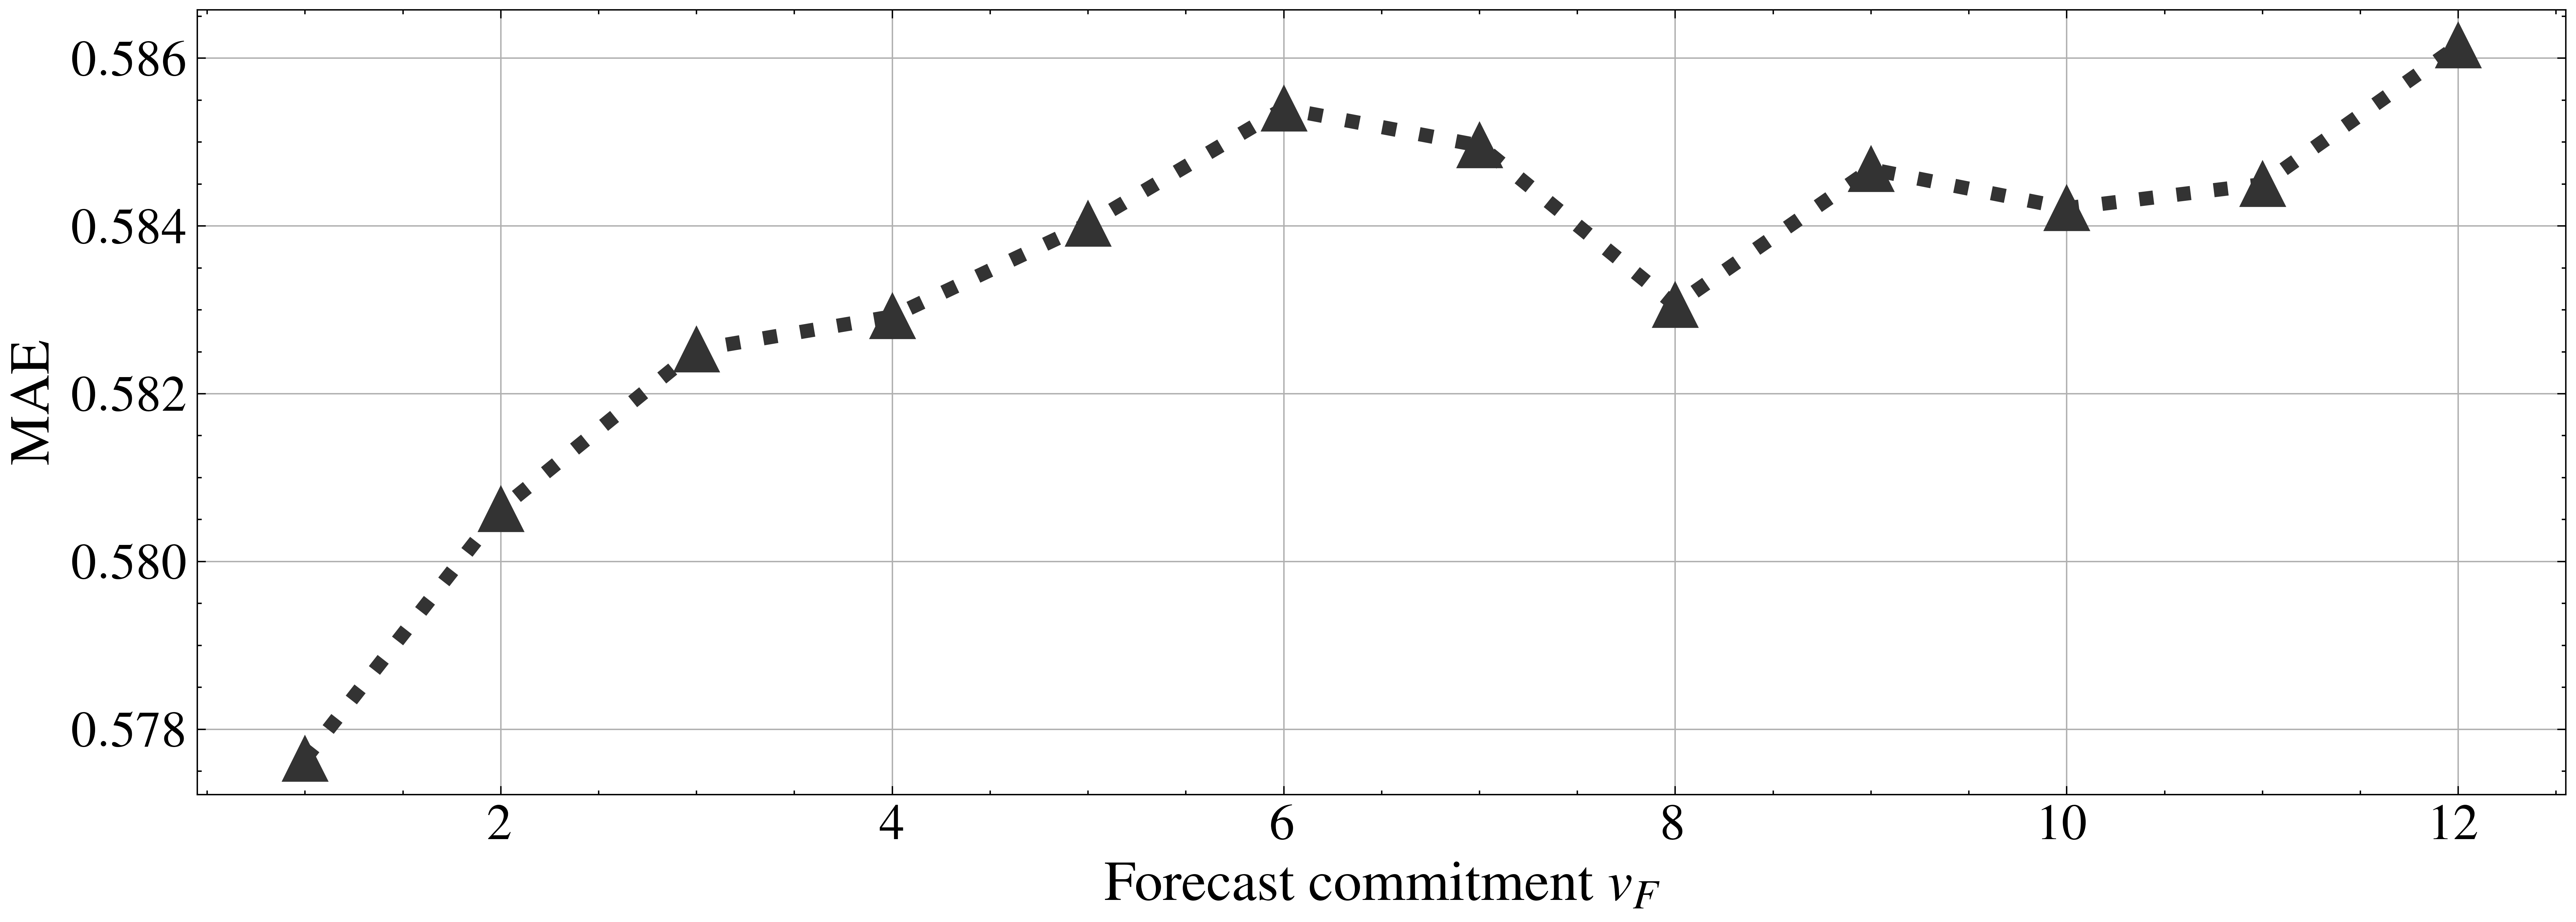

In [9]:
# Set the plot style to 'IEEE' if it's available
plt.style.use(['science','ieee'])
# proportion 2:1
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(MAE_3.index, MAE_3['MAE'], label='Phase 3', marker='^', linestyle='dotted', 
        linewidth=5, markersize=15, color='#333333')

ax.grid()

# make x ticks bigger
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlabel('Forecast commitment $v_{F}$', fontsize=20)
ax.set_ylabel('MAE', fontsize=20)
plt.show()

In [7]:
phase_num = 1
#sMAPC_steps = {}
MAE_steps = {}
#sMAPC_steps_dict = {}
MAE_steps_dict = {}
for step_forecast in range(1, 13):
    #sMAPC_steps[step_forecast] = {}
    MAE_steps[step_forecast] = {}
    tog_forecast = pd.read_csv(f'debug_logs/scen_gurobi_phase_{phase_num}_step_leap_1_forecast_step_{step_forecast}.csv')
    MAE_steps_dict[step_forecast] = calculate_mae_series(phase_num, tog_forecast)
MAE_1  = pd.DataFrame.from_dict(MAE_steps_dict, orient='index', columns=['MAE'])

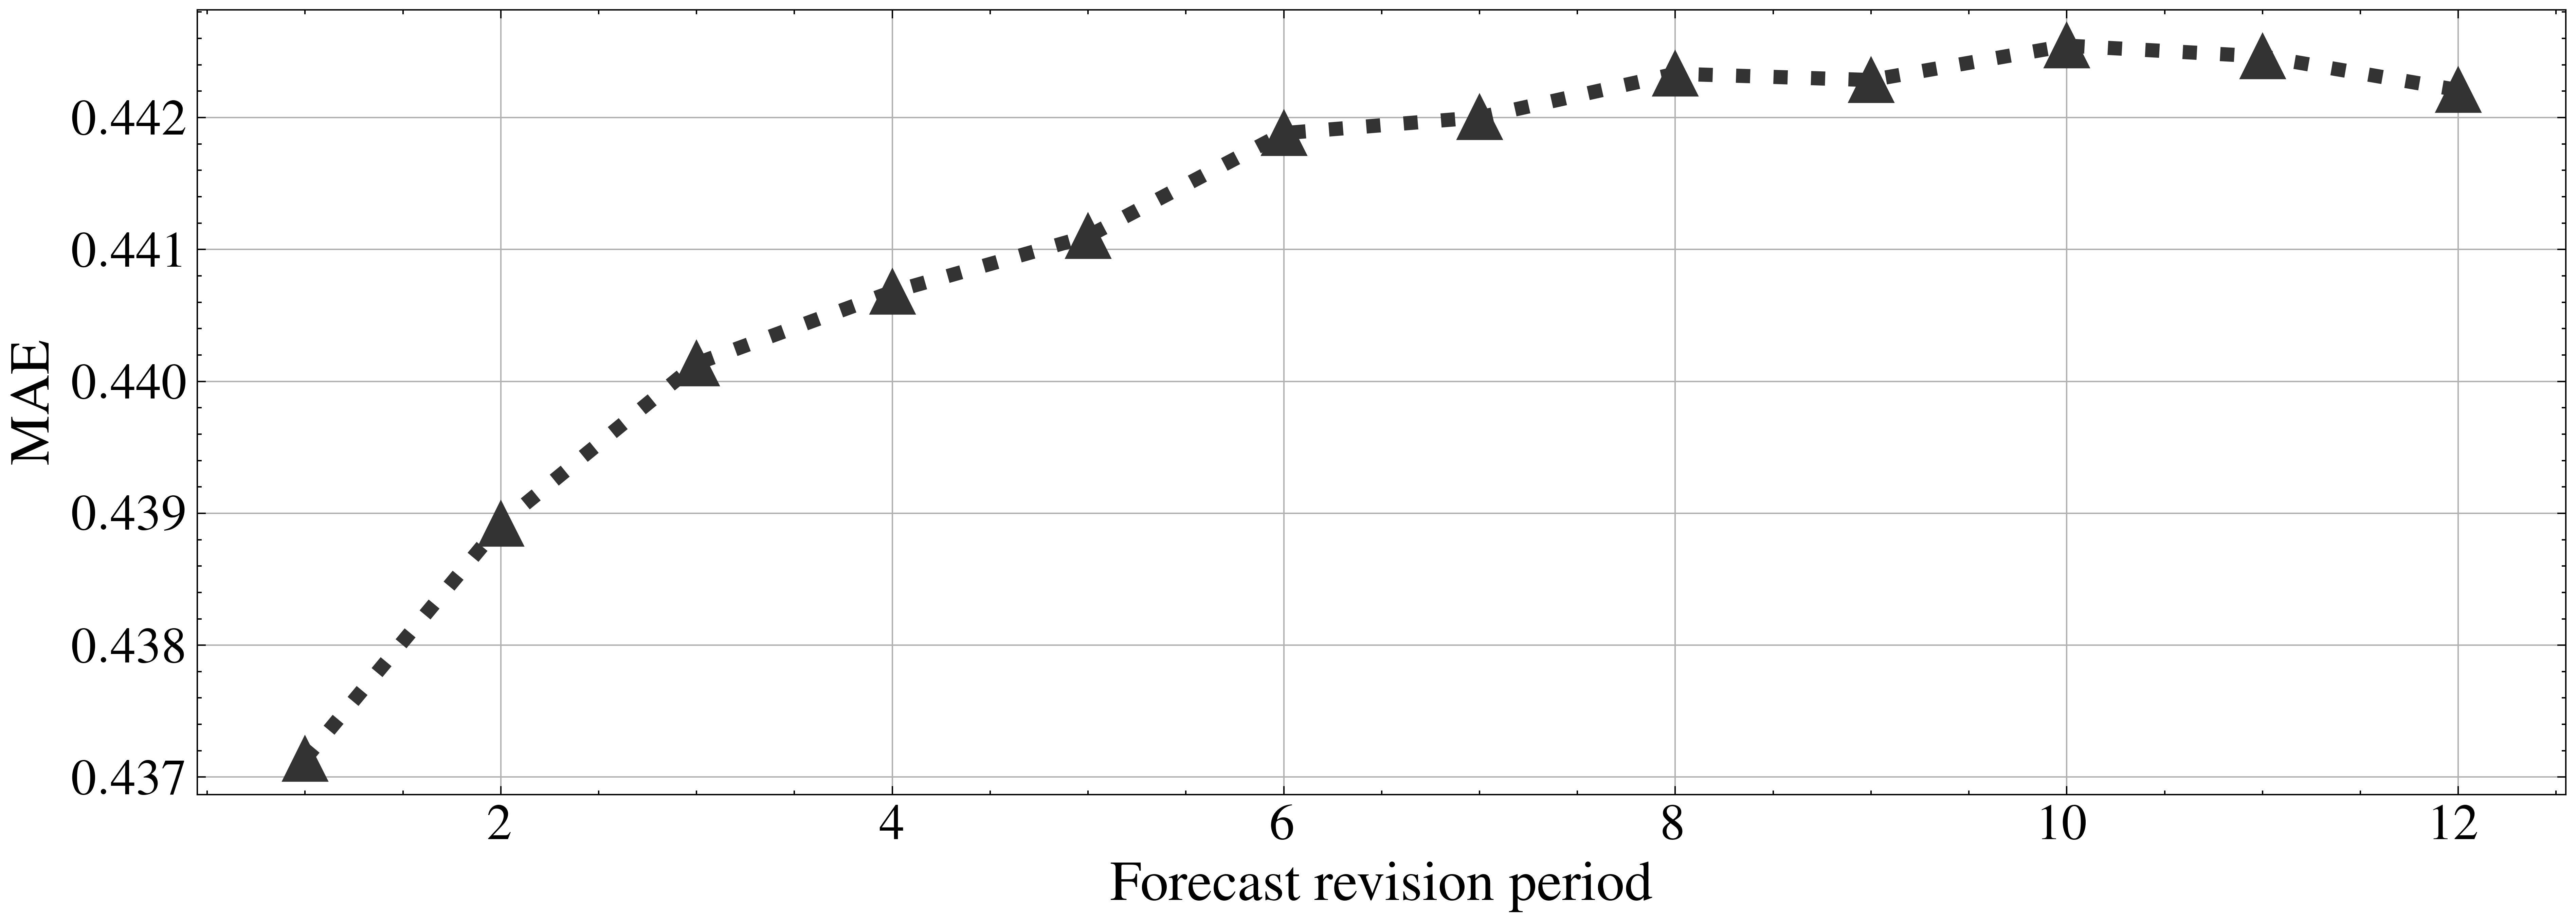

In [9]:
# set style to seaborn
plt.style.use(['science','ieee'])
# proportion 2:1
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(MAE_1.index, MAE_1['MAE'], label='Phase 3', marker='^', linestyle='dotted', 
        linewidth=5, markersize=15, color='#333333')
ax.grid()
# make x ticks bigger
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.set_xlabel('Forecast revision period', fontsize=20)
ax.set_ylabel('MAE', fontsize=20)
plt.show()

In [61]:
daily = pd.read_csv('debug_logs/scen_daily_persistence_phase_3_step_leap_1_forecast_step_1.csv')
weekly_means = pd.read_csv('debug_logs/scen_weekly_means_phase_3_step_leap_1_forecast_step_1.csv')
forec_point = pd.read_csv('debug_logs/scen_gurobi_step_leap_1_forecast_step_1.csv')

In [62]:
MAE_daily = calculate_mae_series(3, daily)
MAE_weekly_means = calculate_mae_series(3, weekly_means)
MAE_forec_point = calculate_mae_series(3, forec_point)
print(f'MAE_daily: {MAE_daily}')
print(f'MAE_weekly_means: {MAE_weekly_means}')
print(f'MAE forecast point: {MAE_forec_point}')
RMSE_daily = calculate_rmse_series(3, daily)
RMSE_weekly_means = calculate_rmse_series(3, weekly_means)
RMSE_forec_point = calculate_rmse_series(3, forec_point)
print(f'RMSE_daily: {RMSE_daily}')
print(f'RMSE_weekly_means: {RMSE_weekly_means}')
print(f'RMSE forecast point: {RMSE_forec_point}')
WAPE_daily = calculate_wape_series(3, daily)
WAPE_weekly_means = calculate_wape_series(3, weekly_means)
WAPE_forec_point = calculate_wape_series(3, forec_point)
print(f'WAPE_daily: {WAPE_daily}')
print(f'WAPE_weekly_means: {WAPE_weekly_means}')
print(f'WAPE forecast point: {WAPE_forec_point}')
WRMSPE_daily = calculate_wrmspe_series(3, daily)
WRMSPE_weekly_means = calculate_wrmspe_series(3, weekly_means)
WRMSPE_forec_point = calculate_wrmspe_series(3, forec_point)
print(f'WRMSPE_daily: {WRMSPE_daily}')
print(f'WRMSPE_weekly_means: {WRMSPE_weekly_means}')
print(f'WRMSPE forecast point: {WRMSPE_forec_point}')

MAE_daily: 0.620289896563598
MAE_weekly_means: 0.5619284210440044
MAE forecast point: 0.5776456003397413
RMSE_daily: 0.9755971467472909
RMSE_weekly_means: 0.8271466013383814
RMSE forecast point: 0.8353611223761678
WAPE_daily: 0.570769985072651
WAPE_weekly_means: 0.5224440119213479
WAPE forecast point: 0.6207693601914652
WRMSPE_daily: 0.9394148935499759
WRMSPE_weekly_means: 0.8028641944501418
WRMSPE forecast point: 0.9055549094672269


In [63]:
WRMSPE = calculate_wrmspe(3)
WAPE = calculate_wape(3)
MAE = calculate_mae(3)
MASE, _, _, _ = calculate_mase(3)
RMSE = calculate_rmse(3)

In [66]:
df.T

,WRMSPE,WAPE,MAE,MASE,RMSE
daily persistence,0.939,0.571,0.620,NaN,0.976
weekly average,0.803,0.522,0.562,NaN,0.827
Forecast,0.906,0.621,0.578,1.162,0.835


In [67]:
list_metrics = [WRMSPE, WAPE, MAE, MASE, RMSE]
list_benchmarks = [[WRMSPE_daily, WRMSPE_weekly_means],[WAPE_daily, WAPE_weekly_means], [MAE_daily, MAE_weekly_means], [MASE, MASE], [RMSE_daily, RMSE_weekly_means]]
metric_names = ['WRMSPE', 'WAPE', 'MAE', 'MASE', 'RMSE']
# Create a DataFrame from the metrics
df = pd.DataFrame([WRMSPE[1], WAPE[1], MAE[1], MASE[1], RMSE[1]], index=metric_names, columns=['Forecast'])

# Apply a color gradient to the DataFrame
#df.style.background_gradient(cmap='viridis')
# add rows for daily and weekly means
df['daily persistence'] = [WRMSPE_daily, WAPE_daily, MAE_daily, np.nan, RMSE_daily]
df['weekly average'] = [WRMSPE_weekly_means, WAPE_weekly_means, MAE_weekly_means, np.nan, RMSE_weekly_means]
# bring last two columns to the front
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]
# cmap option from yellow to green
pallette = sns.light_palette("seagreen", as_cmap=True)
# round to 3 decimals
df = df.round(3)
# # colour gradient each row
html = df.T.style.set_precision(3).background_gradient(cmap=pallette, axis=0).render()
html

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_47381/3477407627.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  html = df.T.style.set_precision(3).background_gradient(cmap=pallette, axis=0).render()
/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_47381/3477407627.py:21: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = df.T.style.set_precision(3).background_gradient(cmap=pallette, axis=0).render()


'<style type="text/css">\n#T_3fb70_row0_col0, #T_3fb70_row0_col2, #T_3fb70_row0_col4, #T_3fb70_row2_col1 {\n  background-color: #2e8b57;\n  color: #f1f1f1;\n}\n#T_3fb70_row0_col1 {\n  background-color: #8ebfa3;\n  color: #000000;\n}\n#T_3fb70_row0_col3, #T_3fb70_row1_col0, #T_3fb70_row1_col1, #T_3fb70_row1_col2, #T_3fb70_row1_col3, #T_3fb70_row1_col4, #T_3fb70_row2_col3 {\n  background-color: #ebf3ed;\n  color: #000000;\n}\n#T_3fb70_row2_col0 {\n  background-color: #5ca47c;\n  color: #f1f1f1;\n}\n#T_3fb70_row2_col2 {\n  background-color: #b7d6c4;\n  color: #000000;\n}\n#T_3fb70_row2_col4 {\n  background-color: #e1ede6;\n  color: #000000;\n}\n</style>\n<table id="T_3fb70">\n  <thead>\n    <tr>\n      <th class="blank level0" >&nbsp;</th>\n      <th id="T_3fb70_level0_col0" class="col_heading level0 col0" >WRMSPE</th>\n      <th id="T_3fb70_level0_col1" class="col_heading level0 col1" >WAPE</th>\n      <th id="T_3fb70_level0_col2" class="col_heading level0 col2" >MAE</th>\n      <th id="

In [68]:
import imgkit
# Convert the HTML string to a PNG file
imgkit.from_string(html, 'plots/accuracies_point_phase3.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

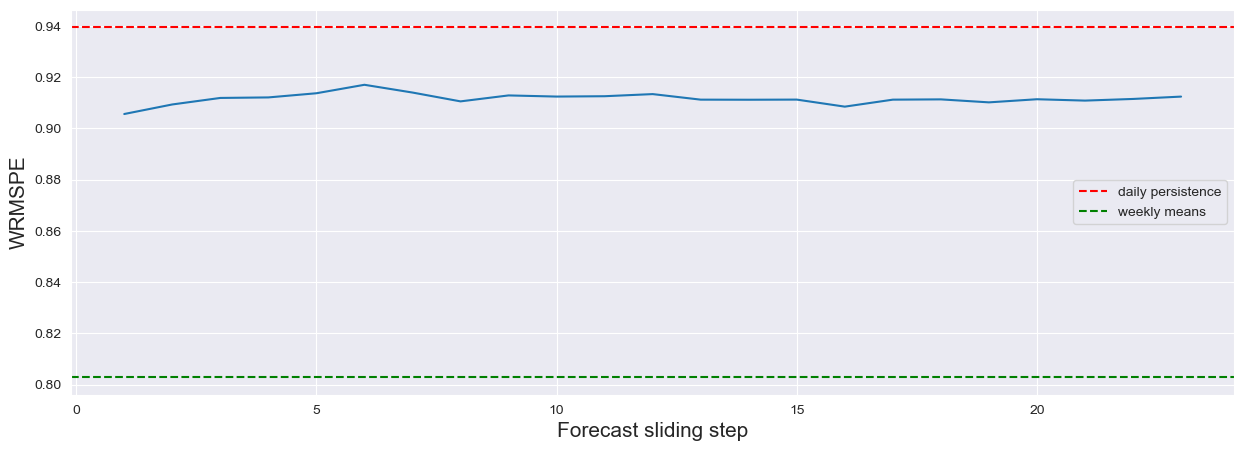

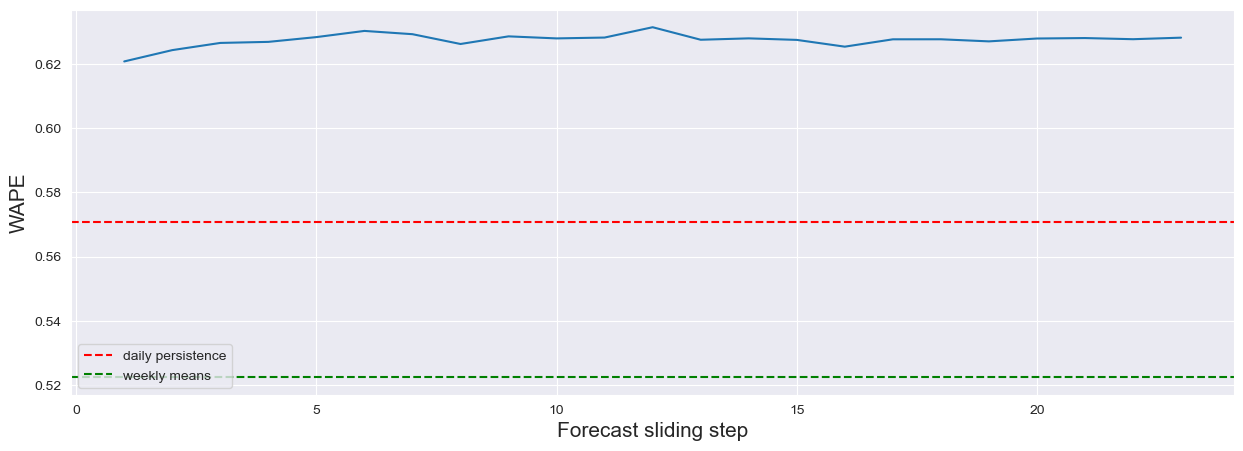

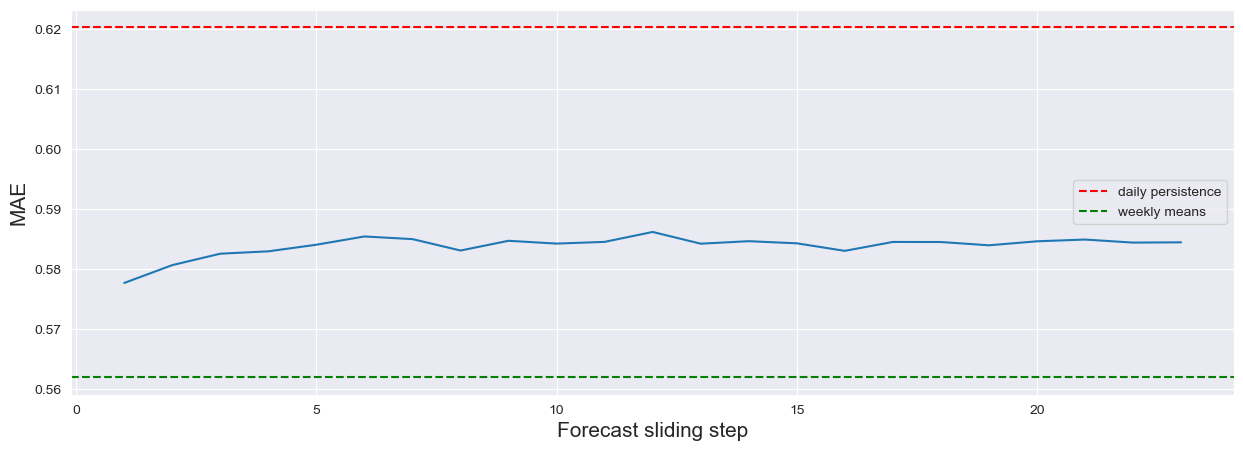

No handles with labels found to put in legend.


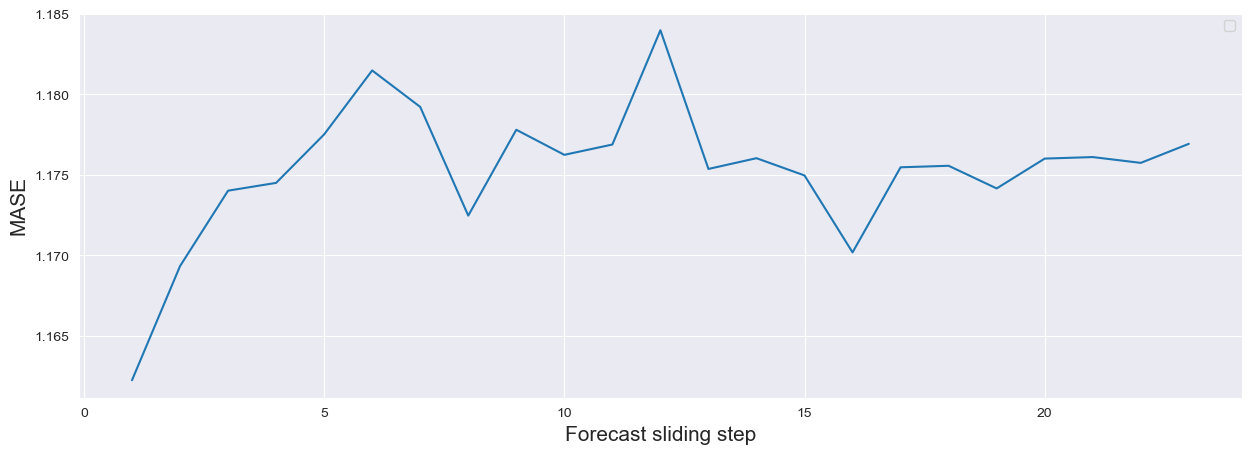

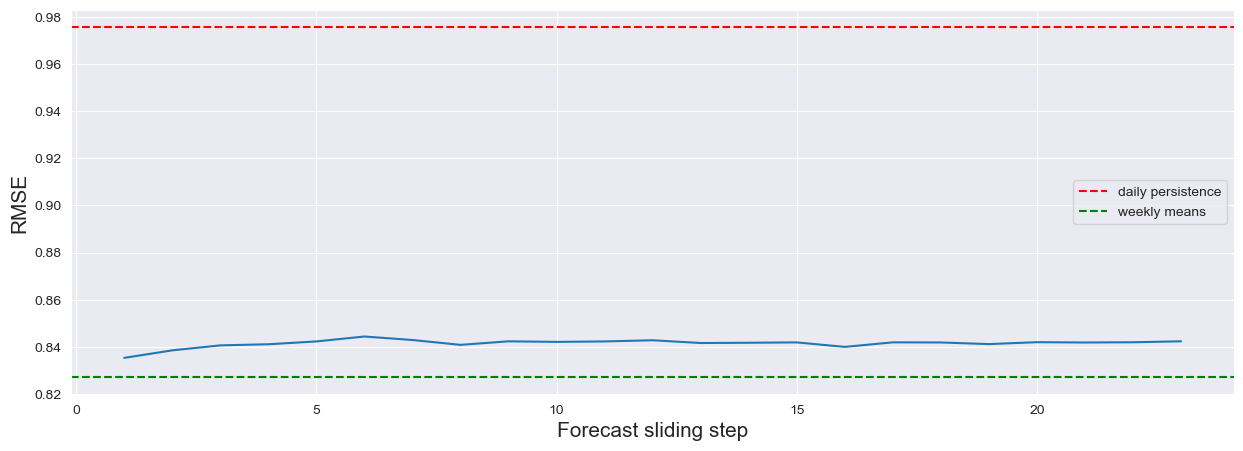

In [124]:
list_metrics = [WRMSPE, WAPE, MAE, MASE, RMSE]
list_benchmarks = [[WRMSPE_daily, WRMSPE_weekly_means],[WAPE_daily, WAPE_weekly_means], [MAE_daily, MAE_weekly_means], [MASE, MASE], [RMSE_daily, RMSE_weekly_means]]
metric_names = ['WRMSPE', 'WAPE', 'MAE', 'MASE', 'RMSE']
for i,metric in enumerate(list_metrics):
    # seaborn darkgrid style
    sns.set_style("darkgrid")
    # plot just the MAC
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(list(metric.keys()), list(metric.values()))
    if metric != MASE:
        # plot a horizontal line for the daily persistence benchmark
        ax.axhline(list_benchmarks[i][0], color='r', linestyle='--', label='daily persistence')
        # plot a horizontal line for the weekly means benchmark
        ax.axhline(list_benchmarks[i][1], color='g', linestyle='--', label='weekly means')
        #ax.plot(list_benchmarks[i][0], label='daily persistence')
        #ax.plot(list_benchmarks[i][1], label='weekly means')
    ax.set_xlabel('Forecast sliding step', size=15)
    ax.set_ylabel(f'{metric_names[i]}', size=15)
    plt.legend()
    #ax.set_title(f'WAPE vs forecast deployment step', size=20)
    plt.show()

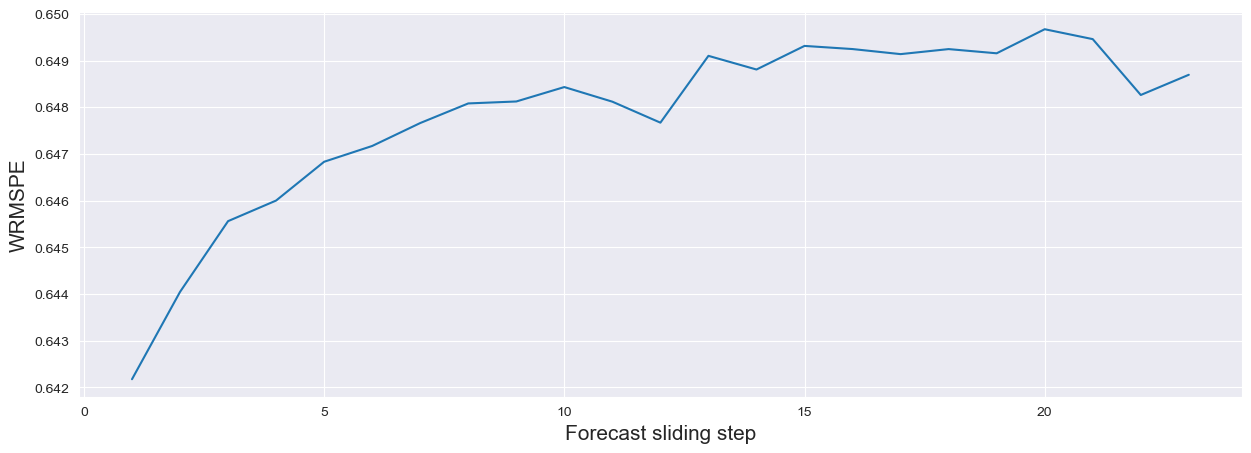

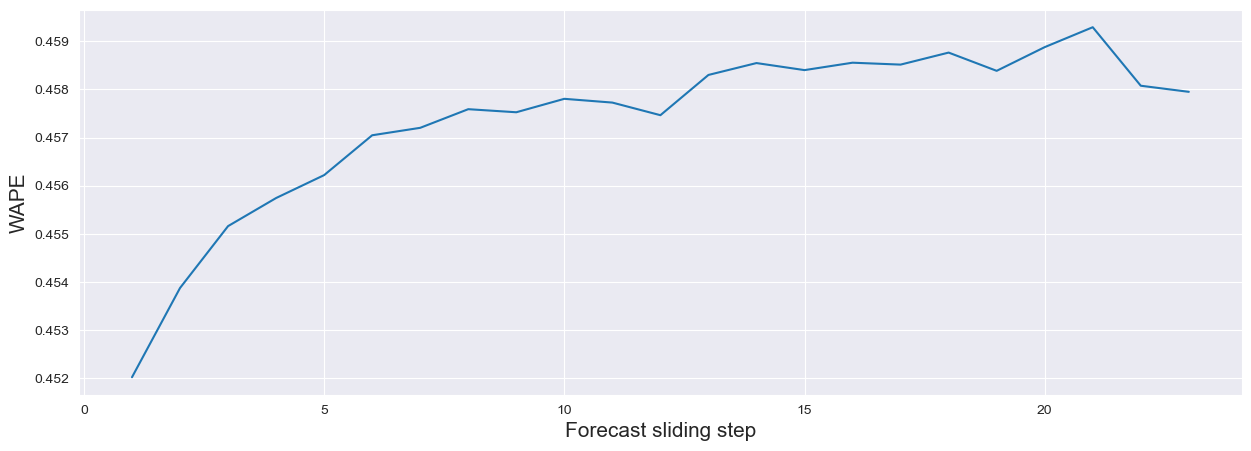

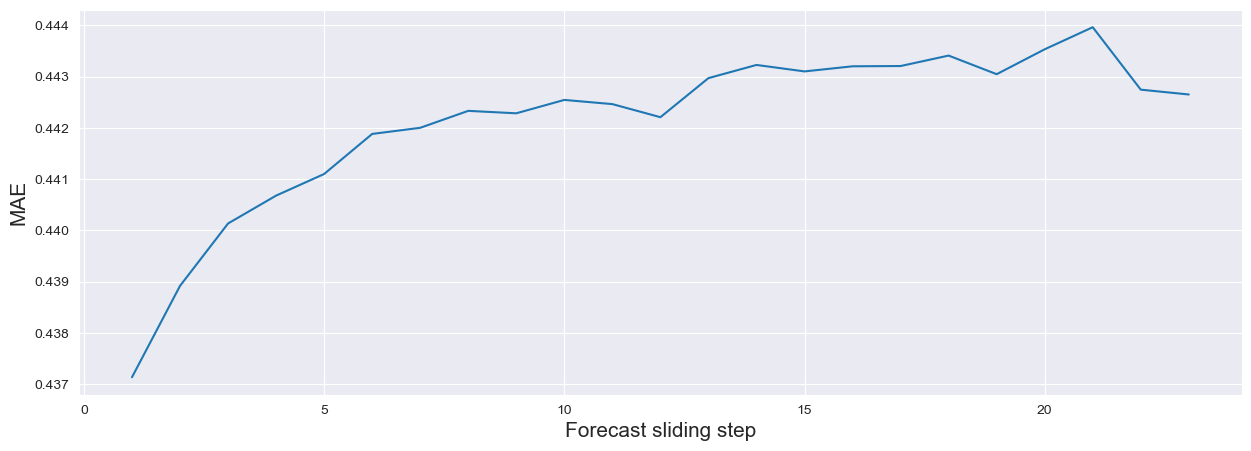

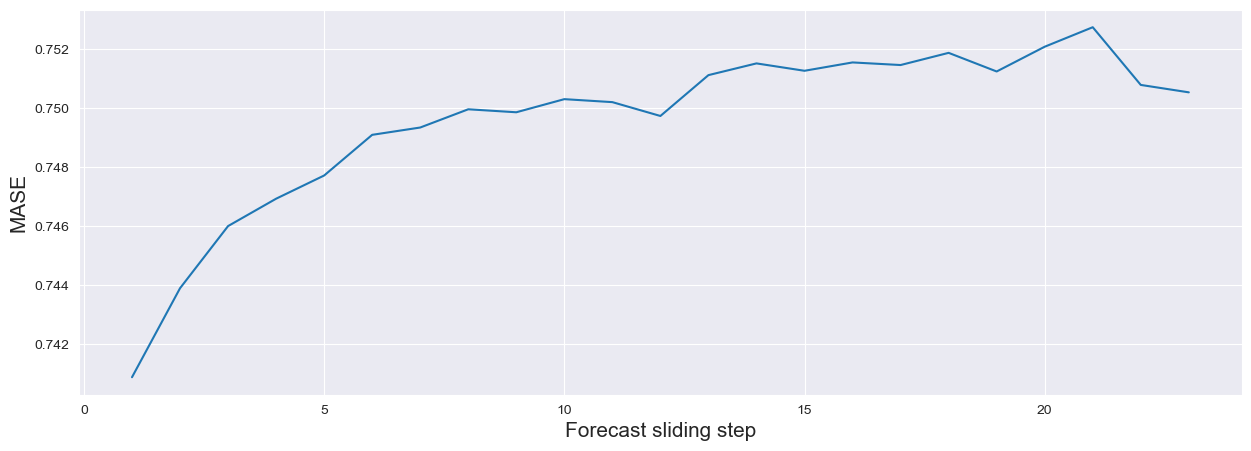

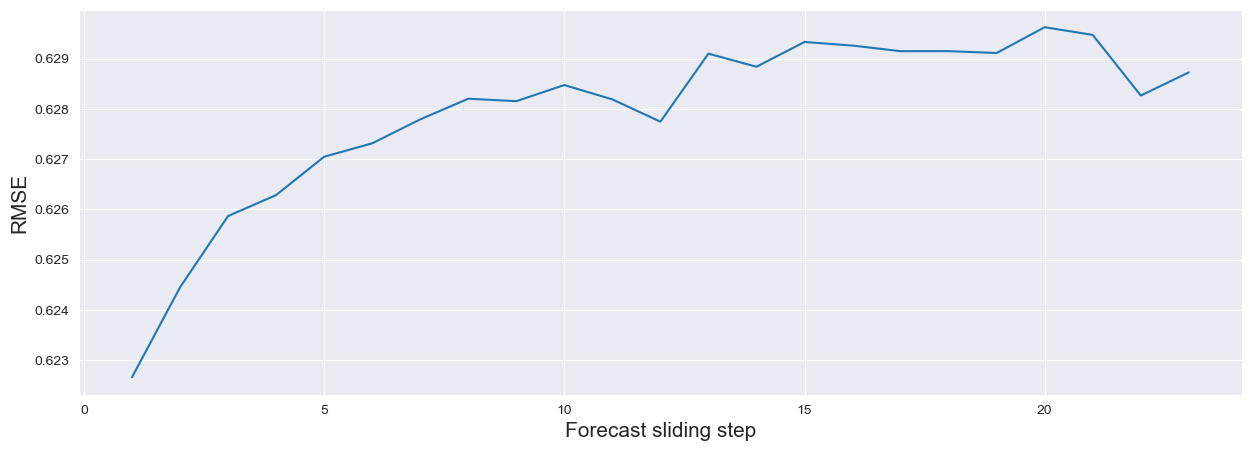

In [101]:
list_metrics = [WRMSPE_ph1, WAPE_ph1, MAE_ph1, MASE_ph1, RMSE_ph1]
metric_names = ['WRMSPE', 'WAPE', 'MAE', 'MASE', 'RMSE']
for i,metric in enumerate(list_metrics):
    # seaborn darkgrid style
    sns.set_style("darkgrid")
    # plot just the MAC
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(list(metric.keys()), list(metric.values()))
    ax.set_xlabel('Forecast sliding step', size=15)
    ax.set_ylabel(f'{metric_names[i]}', size=15)
    #ax.set_title(f'WAPE vs forecast deployment step', size=20)
    plt.show()

In [69]:
WRMSPE_ph1 = calculate_wrmspe(1)
WAPE_ph1 = calculate_wape(1)
MAE_ph1 = calculate_mae(1)
MASE_ph1, _, _, _ = calculate_mase(1)
RMSE_ph1 = calculate_rmse(1)

In [70]:
daily = pd.read_csv('debug_logs/scen_daily_persistence_phase_1_step_leap_1_forecast_step_1.csv')
weekly_means = pd.read_csv('debug_logs/scen_weekly_means_phase_1_step_leap_1_forecast_step_1.csv')
forec_point = pd.read_csv('debug_logs/scen_gurobi_step_leap_1_forecast_step_1.csv')

In [71]:
MAE_daily = calculate_mae_series(1, daily)
MAE_weekly_means = calculate_mae_series(1, weekly_means)
MAE_forec_point = calculate_mae_series(1, forec_point)
print(f'MAE_daily: {MAE_daily}')
print(f'MAE_weekly_means: {MAE_weekly_means}')
print(f'MAE forecast point: {MAE_forec_point}')
RMSE_daily = calculate_rmse_series(1, daily)
RMSE_weekly_means = calculate_rmse_series(1, weekly_means)
RMSE_forec_point = calculate_rmse_series(1, forec_point)
print(f'RMSE_daily: {RMSE_daily}')
print(f'RMSE_weekly_means: {RMSE_weekly_means}')
print(f'RMSE forecast point: {RMSE_forec_point}')
WAPE_daily = calculate_wape_series(1, daily)
WAPE_weekly_means = calculate_wape_series(1, weekly_means)
WAPE_forec_point = calculate_wape_series(1, forec_point)
print(f'WAPE_daily: {WAPE_daily}')
print(f'WAPE_weekly_means: {WAPE_weekly_means}')
print(f'WAPE forecast point: {WAPE_forec_point}')
WRMSPE_daily = calculate_wrmspe_series(1, daily)
WRMSPE_weekly_means = calculate_wrmspe_series(1, weekly_means)
WRMSPE_forec_point = calculate_wrmspe_series(1, forec_point)
print(f'WRMSPE_daily: {WRMSPE_daily}')
print(f'WRMSPE_weekly_means: {WRMSPE_weekly_means}')
print(f'WRMSPE forecast point: {WRMSPE_forec_point}')

MAE_daily: 0.5956598265199702
MAE_weekly_means: 0.5551979448333458
MAE forecast point: 0.8311464331273607
RMSE_daily: 0.9099477226790593
RMSE_weekly_means: 0.7875139625212123
RMSE forecast point: 1.1268675554240075
WAPE_daily: 0.6125907372487032
WAPE_weekly_means: 0.5740831346743882
WAPE forecast point: 0.879563750910056
WRMSPE_daily: 0.9348776152332577
WRMSPE_weekly_means: 0.813464542078731
WRMSPE forecast point: 1.19550348926573


In [72]:
list_metrics = [WRMSPE_ph1, WAPE_ph1, MAE_ph1, MASE_ph1, RMSE_ph1]
list_benchmarks = [[WRMSPE_daily, WRMSPE_weekly_means],[WAPE_daily, WAPE_weekly_means], [MAE_daily, MAE_weekly_means], [MASE, MASE], [RMSE_daily, RMSE_weekly_means]]
metric_names = ['WRMSPE', 'WAPE', 'MAE', 'MASE', 'RMSE']
# Create a DataFrame from the metrics
df = pd.DataFrame([WRMSPE_ph1[1], WAPE_ph1[1], MAE_ph1[1], MASE_ph1[1], RMSE_ph1[1]], index=metric_names, columns=['Forecast'])

# Apply a color gradient to the DataFrame
#df.style.background_gradient(cmap='viridis')
# add rows for daily and weekly means
df['daily persistence'] = [WRMSPE_daily, WAPE_daily, MAE_daily, np.nan, RMSE_daily]
df['weekly average'] = [WRMSPE_weekly_means, WAPE_weekly_means, MAE_weekly_means, np.nan, RMSE_weekly_means]
# bring last two columns to the front
cols = df.columns.tolist()
cols = cols[-2:] + cols[:-2]
df = df[cols]
# cmap option from yellow to green
pallette = sns.light_palette("seagreen", as_cmap=True)
# round to 3 decimals
df = df.round(3)
# # colour gradient each row
styled_df = df.T.style.set_precision(3)
styled_df = styled_df.background_gradient(cmap=pallette, axis=0)
html = styled_df.render()

/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_47381/1190616553.py:21: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  styled_df = df.T.style.set_precision(3)
/var/folders/8b/4kssy4kj57jb6rv1pmm5w8h80000gn/T/ipykernel_47381/1190616553.py:23: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  html = styled_df.render()


In [73]:
import imgkit
# Convert the HTML string to a PNG file
imgkit.from_string(html, 'plots/accuracies_point_phase1.png')

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True